**BigMart Sales Prediction practice problem**

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). We need to predict the sales for test data set.


* Item_Identifier: Unique product ID

* Item_Weight: Weight of product

* Item_Fat_Content: Whether the product is low fat or not

* Item_Visibility: The % of total display area of all products in a store allocated to the particular product

* Item_Type: The category to which the product belongs

* Item_MRP: Maximum Retail Price (list price) of the product

* Outlet_Identifier: Unique store ID

* Outlet_Establishment_Year: The year in which store was established

* Outlet_Size: The size of the store in terms of ground area covered

* Outlet_Location_Type: The type of city in which the store is located

* Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

* Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

**Load Libraries**

In [1]:
pip install pyforest

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pyforest import*
lazy_imports()

['import matplotlib.pyplot as plt',
 'from PIL import Image',
 'from fbprophet import Prophet',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.model_selection import KFold',
 'import numpy as np',
 'import statistics',
 'from sklearn.ensemble import RandomForestRegressor',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.linear_model import LinearRegression',
 'import xgboost as xgb',
 'import plotly.express as px',
 'import statsmodels.api as sm',
 'import dash',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'from sklearn.model_selection import GridSearchCV',
 'from sklearn.preprocessing import MinMaxScaler',
 'from sklearn.decomposition import PCA',
 'import sys',
 'import pydot',
 'from sklearn.preprocessing import OneHotEncoder',
 'import skimage',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import sklearn',
 'from sklearn.ensemble import GradientBoost

In [3]:
import warnings
warnings.filterwarnings("ignore")

**Data Mining**

In [4]:
train= pd.read_csv('C:/Users/ADMIN/OneDrive/Desktop/project prepleaf/train.csv')
test= pd.read_csv('C:/Users/ADMIN/OneDrive/Desktop/project prepleaf/test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Exploratory Data Analysis**

In [5]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [6]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [8]:
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train, test], sort = False)
print(train.shape, test.shape, data.shape)

<IPython.core.display.Javascript object>

(8523, 13) (5681, 13) (14204, 13)


In [9]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [10]:
categorial_features = data.select_dtypes(include=[np.object])
categorial_features.head(2)

<IPython.core.display.Javascript object>

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train


In [11]:
num_data= data.select_dtypes(include=[np.number])
num_data.head(2)

<IPython.core.display.Javascript object>

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

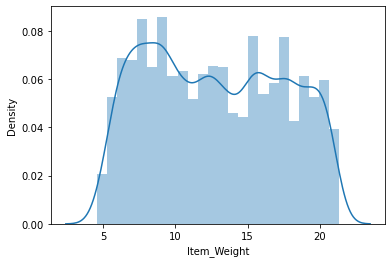

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

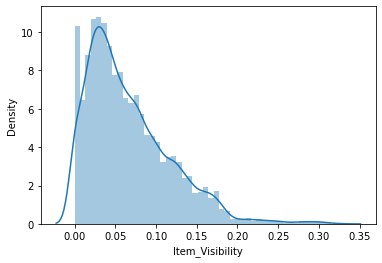

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

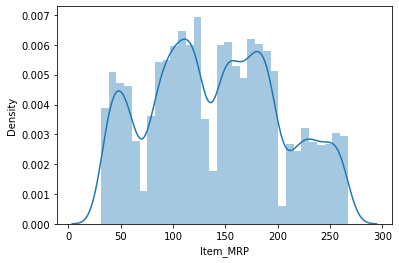

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

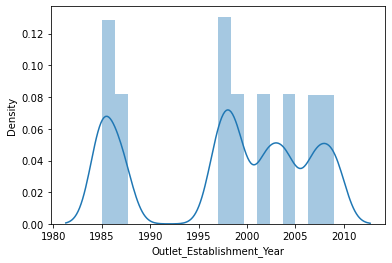

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

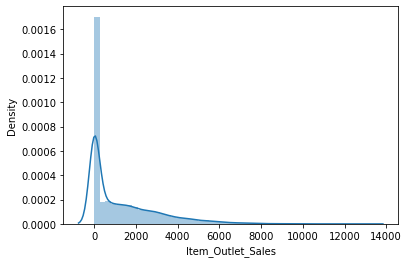

In [12]:
for i in data.describe().columns:
  sns.distplot(data[i])
  plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

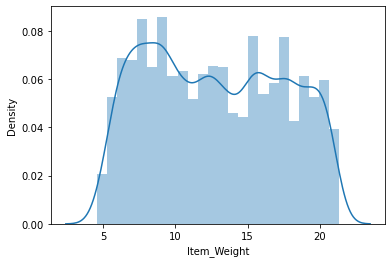

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

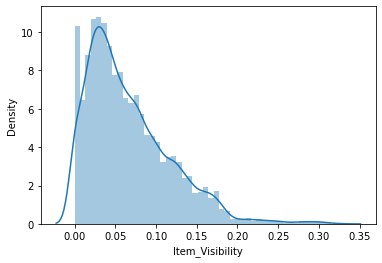

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

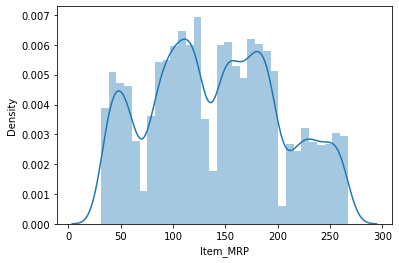

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

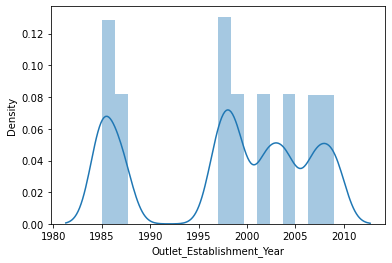

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

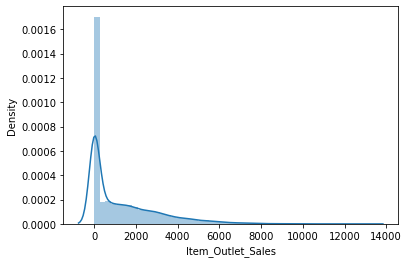

In [13]:
for i in data.describe().columns:
  sns.distplot(data[i].dropna())
  plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

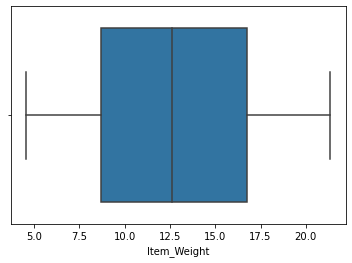

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

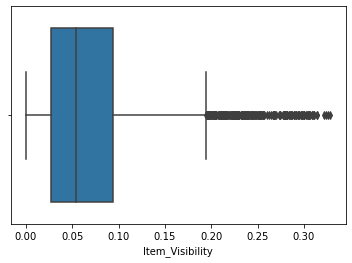

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

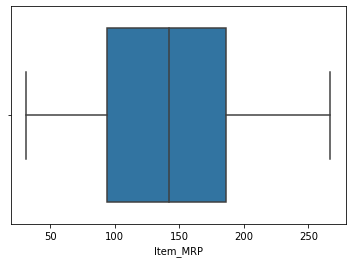

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

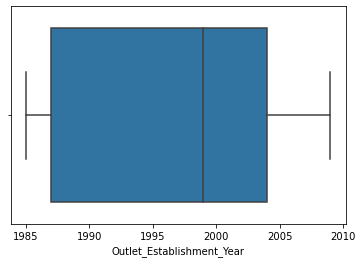

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

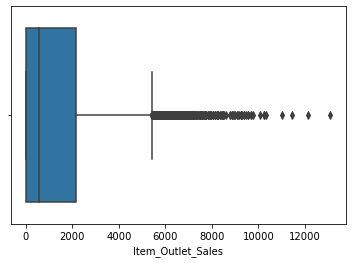

In [14]:
for i in data.describe().columns:
  sns.boxplot(data[i])
  plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

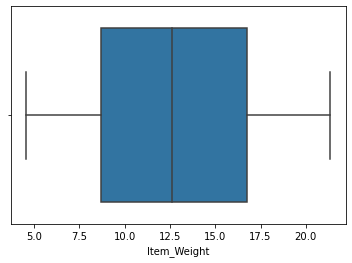

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

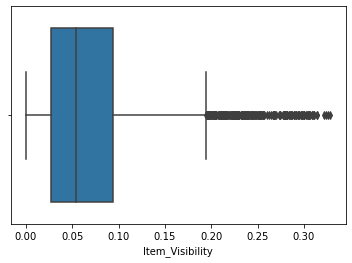

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

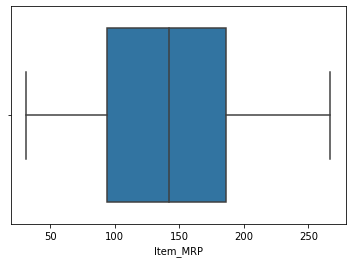

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

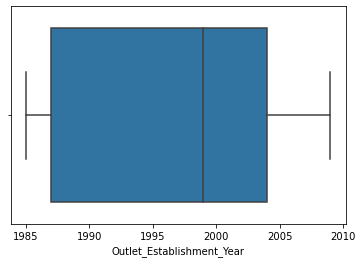

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

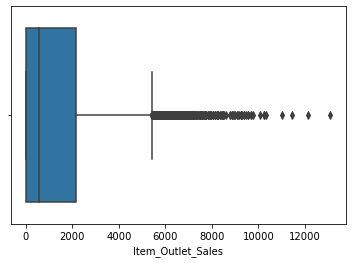

In [15]:
for i in num_data.columns:
    sns.boxplot(num_data[i])     
    plt.show()    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

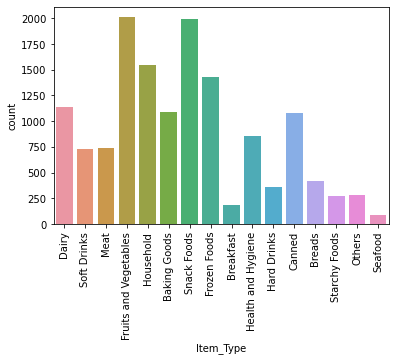

In [16]:
sns.countplot(data.Item_Type)
plt.xticks(rotation=90)

In [17]:
data.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

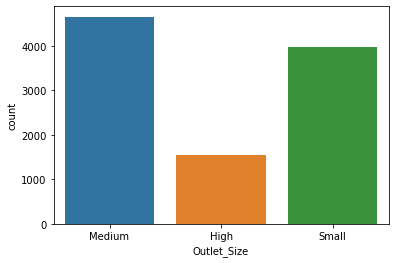

In [18]:
sns.countplot(data.Outlet_Size)

In [19]:
data.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

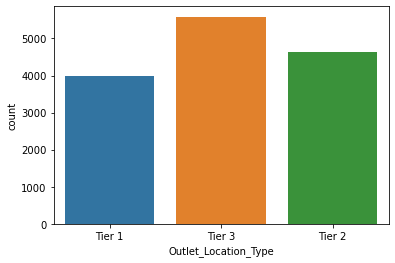

In [20]:
sns.countplot(data.Outlet_Location_Type)

In [21]:
data.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

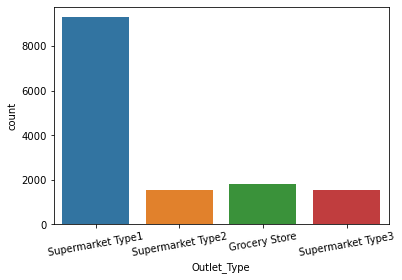

In [22]:
sns.countplot(data.Outlet_Type)
plt.xticks(rotation=10)

In [23]:
corr=data.corr()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

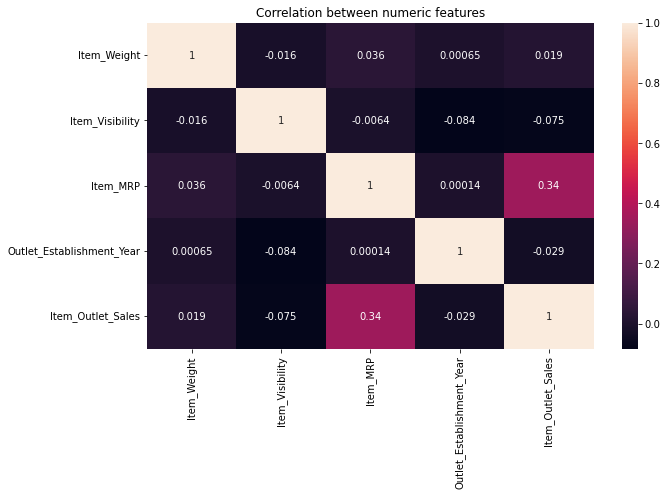

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr,annot=True)
plt.title('Correlation between numeric features')
plt.show()

# Missing values

In [25]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [26]:
data.Item_Weight.isnull().sum()

2439

In [27]:
data.Item_Weight.median()

12.6

In [28]:
data.Item_Weight.fillna(data.Item_Weight.median(),inplace=True)

In [29]:
data.Item_Weight.isnull().sum()

0

In [30]:
data.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [31]:
data.Outlet_Size.fillna('Medium',inplace=True)

In [32]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

Item_Outlet_Sales is our targetcolumn.
Item_Outlet_Sales is given in our Train data but it is not in test data because of that it is showing null values in data.

Modify Item_Visibility

We noticed that the minimum value here is 0, which makes no practical sense. Lets consider it like missing information and impute it with mean visibility of that product.

In [33]:
data.Item_Visibility.unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.1429909 , 0.07352856,
       0.10472015])

In [34]:
data[data.Item_Visibility==0].Item_Visibility.value_counts()

0.0    879
Name: Item_Visibility, dtype: int64

In [35]:
data.Item_Weight.fillna(data.Item_Visibility.median(),inplace=True)

In [36]:
data.Outlet_Establishment_Year.value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [37]:
data['Outlet_Years']=2009-data.Outlet_Establishment_Year
data['Outlet_Years'].describe()          #if it is in year 2009 it will give 0 

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

In [38]:
data['Outlet_Years'].value_counts()

24    2439
22    1553
10    1550
12    1550
5     1550
7     1548
0     1546
2     1543
11     925
Name: Outlet_Years, dtype: int64

In [39]:
data.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [40]:
#in this there are different categories

In [41]:
#changing only the first 2 characters ie in category id
data['New_Item_Type']=data['Item_Identifier'].apply(lambda x:x[0:2])

In [42]:
data['New_Item_Type']=data['New_Item_Type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

data['New_Item_Type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_Type, dtype: int64

In [43]:
#marking non consumable as seperate category
data.loc[data['New_Item_Type']=='Non-Consumable','Item_Fat_Content']='Non-Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       5998
Regular       4824
Non-Edible    2686
LF             367
reg            195
low fat        134
Name: Item_Fat_Content, dtype: int64

In [44]:
data.index = data['Outlet_Establishment_Year']
data.index

Int64Index([1999, 2009, 1999, 1998, 1987, 2009, 1987, 1985, 2002, 2007,
            ...
            1999, 1999, 2009, 1997, 1999, 1997, 2009, 2002, 2007, 2002],
           dtype='int64', name='Outlet_Establishment_Year', length=14204)

In [45]:
df = data.loc[:,['Item_Outlet_Sales']]
df.head(2)

,Item_Outlet_Sales
Outlet_Establishment_Year,
1999,3735.1380
2009,443.4228


**Determine the years of operation of a store**
We wanted to make a new column depicting the years of operation of a store. This can be done as:

In [46]:
data['Outlet_Years'] = 2009 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

**Numerical and One-Hot Coding of Categorical variables**

In [47]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_Type','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [48]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'New_Item_Type','Outlet'])

<IPython.core.display.Javascript object>

In [49]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Item_Fat_Content_3             uint8
Item_Fat_Content_4             uint8
Item_Fat_Content_5             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
New_Item_Type_0                uint8
N

In [50]:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)


In [51]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]


In [52]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [53]:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [54]:
X=train.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],axis=1)

In [55]:
Y=train['Item_Outlet_Sales']

In [56]:
Y

Outlet_Establishment_Year
1999    3735.1380
2009     443.4228
1999    2097.2700
1998     732.3800
1987     994.7052
          ...    
1987    2778.3834
2002     549.2850
2004    1193.1136
2009    1845.5976
1997     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.3, random_state = 100)

# Linear Regression Model:

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score



In [59]:
reg =LinearRegression(normalize=True)

In [60]:
reg.fit(X_train, Y_train)

LinearRegression(normalize=True)

In [61]:
Y_pred = reg.predict(X_test)

Y_pred


array([2898. , 4148.5, 4470. , ...,  863. , 2018. , 1465. ])

In [62]:
metrics.r2_score(Y_test, Y_pred)*100


55.15446407661793

## Decision Tree Model:

In [63]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(X_train, Y_train)


DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [64]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([3151.39338845, 4069.00307374, 4989.43122222, ...,  471.99498281,
       1939.98388687, 1470.69543552])

In [65]:
tree_accuracy = round(regressor.score(X_train,Y_train),2)*100
tree_accuracy

57.99999999999999

In [66]:
r2_score(Y_train, regressor.predict(X_train))*100

57.9413637456789

# Randomforest Regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
rf=RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)

rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=100, n_estimators=400,
                      n_jobs=4)

In [69]:
# Predicting the test set results
y_pred = rf.predict(X_test)
y_pred

array([3156.99273891, 4206.05684722, 5632.83880881, ...,  403.78811088,
       2007.65909059, 1260.61615883])

In [70]:
tree_accuracy = round(rf.score(X_train,Y_train),2)*100
tree_accuracy

61.0

In [71]:
r2_score(Y_train, rf.predict(X_train))*100

60.90253464593094

# XGBoost Regressor

In [72]:
from xgboost import XGBRegressor

In [73]:
model=XGBRegressor(n_estimators=1000,learning_rate=0.05)

model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [74]:
y_pred=model.predict(X_test)

y_pred

array([2879.3423 , 3951.774  , 6377.6157 , ...,  226.59059, 1699.0925 ,
       1270.6825 ], dtype=float32)

In [75]:
model.score(X_train,Y_train)*100

90.47587294648307